## Business Objective:
Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features.

## Data Set Details:
Each row corresponds to a client of a telecommunications company for whom it has collected information about the type of plan they have contracted, the minutes they have talked, or the charge they pay every month.

The data set includes the following variables:
●	account.length: how long the account has been active.
●	voice.plan: yes or no, voicemail plan.
●	voice.messages: number of voicemail messages.
●	intl.plan: yes or no, international plan.
●	intl.mins: minutes customer used service to make international calls.
●	intl.calls: total number of international calls.
●	intl.charge: total international charge.
●	day.mins: minutes customer used service during the day.
●	day.calls: total number of calls during the day.
●	day.charge: total charge during the day.
●	eve.mins: minutes customer used service during the evening.
●	eve.calls: total number of calls during the evening.
●	eve.charge: total charge during the evening.
●	night.mins: minutes customer used service during the night.
●	night.calls: total number of calls during the night.
●	night.charge: total charge during the night.
●	customer.calls: number of calls to customer service.
●	churn: Categorical, yes or no. Indicator of whether the customer has left the company (yes or no).



## 1. Loading Dataset and Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving telecommunications_Dataset.csv to telecommunications_Dataset.csv


In [3]:
df= pd.read_csv('telecommunications_Dataset.csv')
df.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0

## 2. Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [5]:
df.shape

(3333, 19)

In [6]:
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

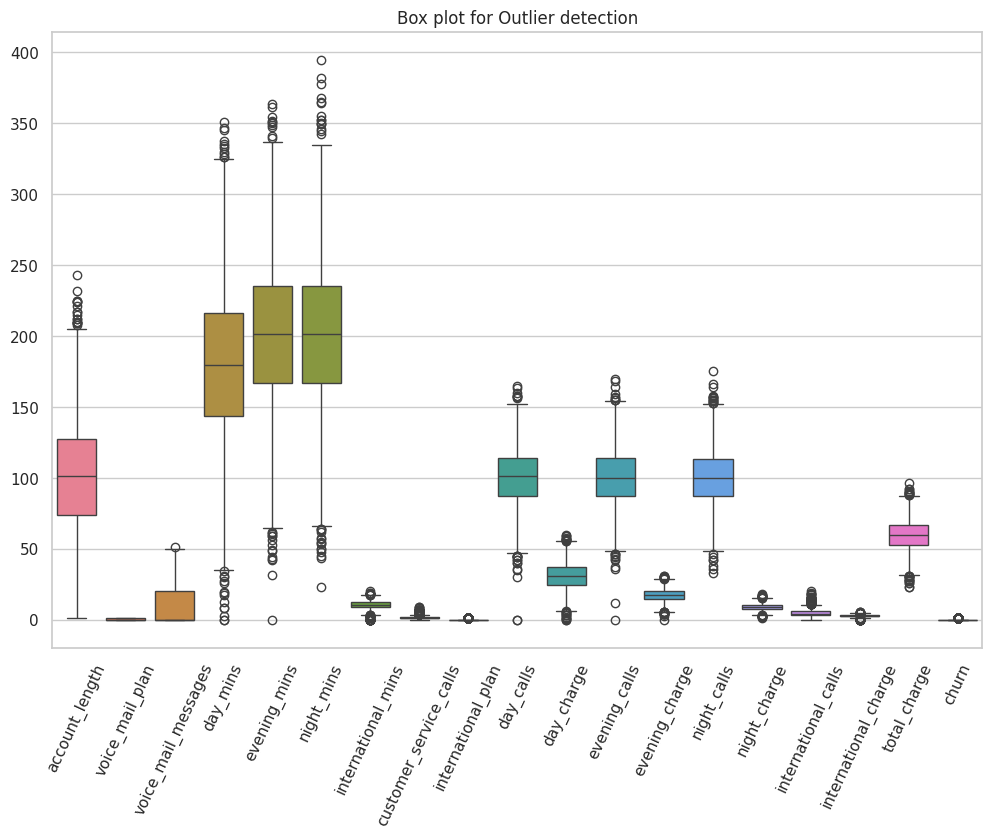

In [8]:
# 1. Box plot for Outlier Detection
cols_to_plot= [col for col in df.columns]

plt.figure(figsize=(12,8))
sns.boxplot(data = df[cols_to_plot])
plt.title('Box plot for Outlier detection')
plt.xticks(rotation=65)
plt.show()

It highlights median values, interquartile ranges, and potential outliers, showing that several features (like day_mins, evening_mins, night_mins) have many high-value outliers.

## 3. EDA

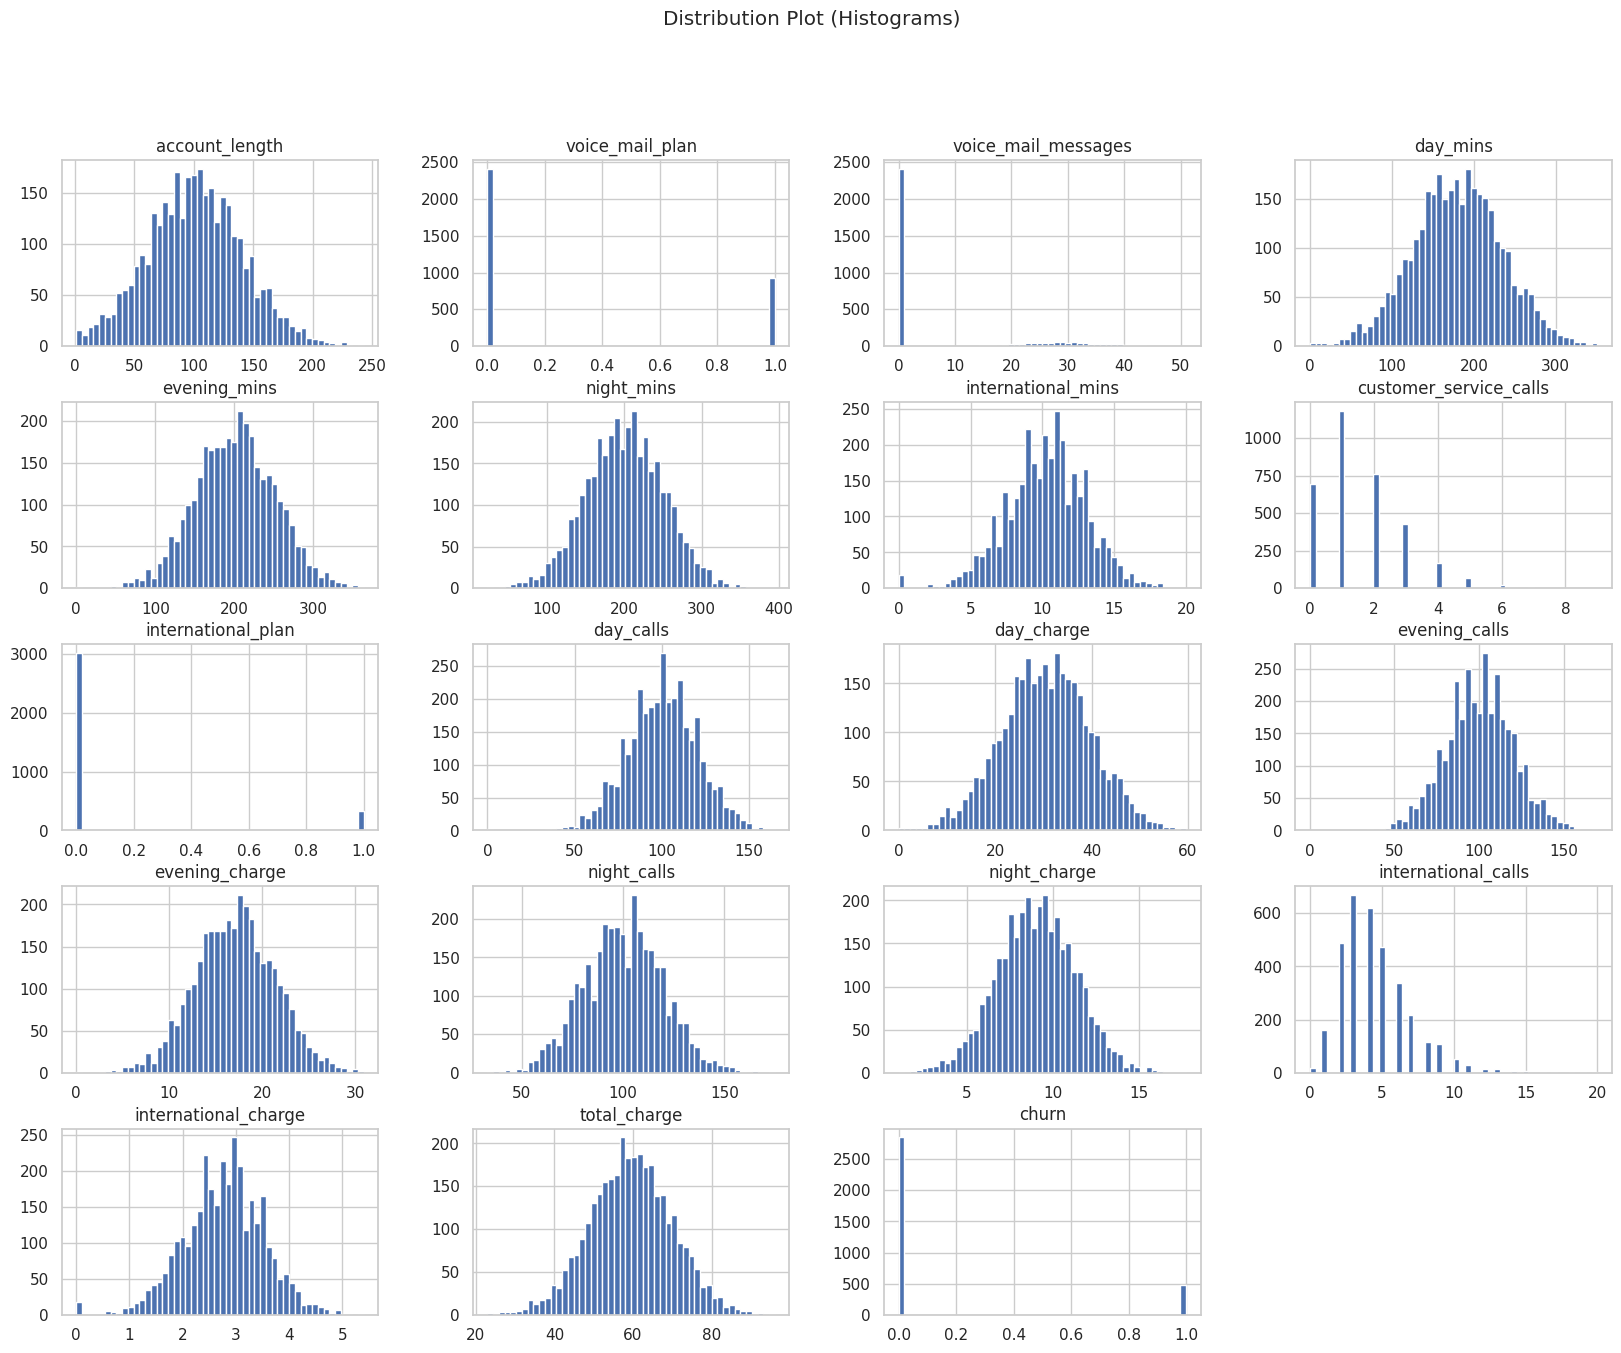

In [9]:
# 2. Distribution Plot
df.hist(bins= 50, figsize=(20,15))
plt.suptitle('Distribution Plot (Histograms)')
plt.show()

Most usage-related features (like day_mins, evening_mins, total_charge) follow near-normal distributions, while categorical features (voice_mail_plan, international_plan, churn) are heavily imbalanced

In [10]:
from scipy.stats import skew, kurtosis

for col in cols_to_plot:
  print(f'{col} - Skewness: {skew(df[col]):.2f}, Kurtosis: {kurtosis(df[col]):.2f}')

account_length - Skewness: 0.10, Kurtosis: -0.11
voice_mail_plan - Skewness: 1.00, Kurtosis: -1.00
voice_mail_messages - Skewness: 1.26, Kurtosis: -0.05
day_mins - Skewness: -0.03, Kurtosis: -0.02
evening_mins - Skewness: -0.02, Kurtosis: 0.02
night_mins - Skewness: 0.01, Kurtosis: 0.08
international_mins - Skewness: -0.25, Kurtosis: 0.61
customer_service_calls - Skewness: 1.09, Kurtosis: 1.73
international_plan - Skewness: 2.73, Kurtosis: 5.43
day_calls - Skewness: -0.11, Kurtosis: 0.24
day_charge - Skewness: -0.03, Kurtosis: -0.02
evening_calls - Skewness: -0.06, Kurtosis: 0.20
evening_charge - Skewness: -0.02, Kurtosis: 0.02
night_calls - Skewness: 0.03, Kurtosis: -0.07
night_charge - Skewness: 0.01, Kurtosis: 0.08
international_calls - Skewness: 1.32, Kurtosis: 3.08
international_charge - Skewness: -0.25, Kurtosis: 0.61
total_charge - Skewness: -0.03, Kurtosis: 0.05
churn - Skewness: 2.02, Kurtosis: 2.07


In [11]:
df.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

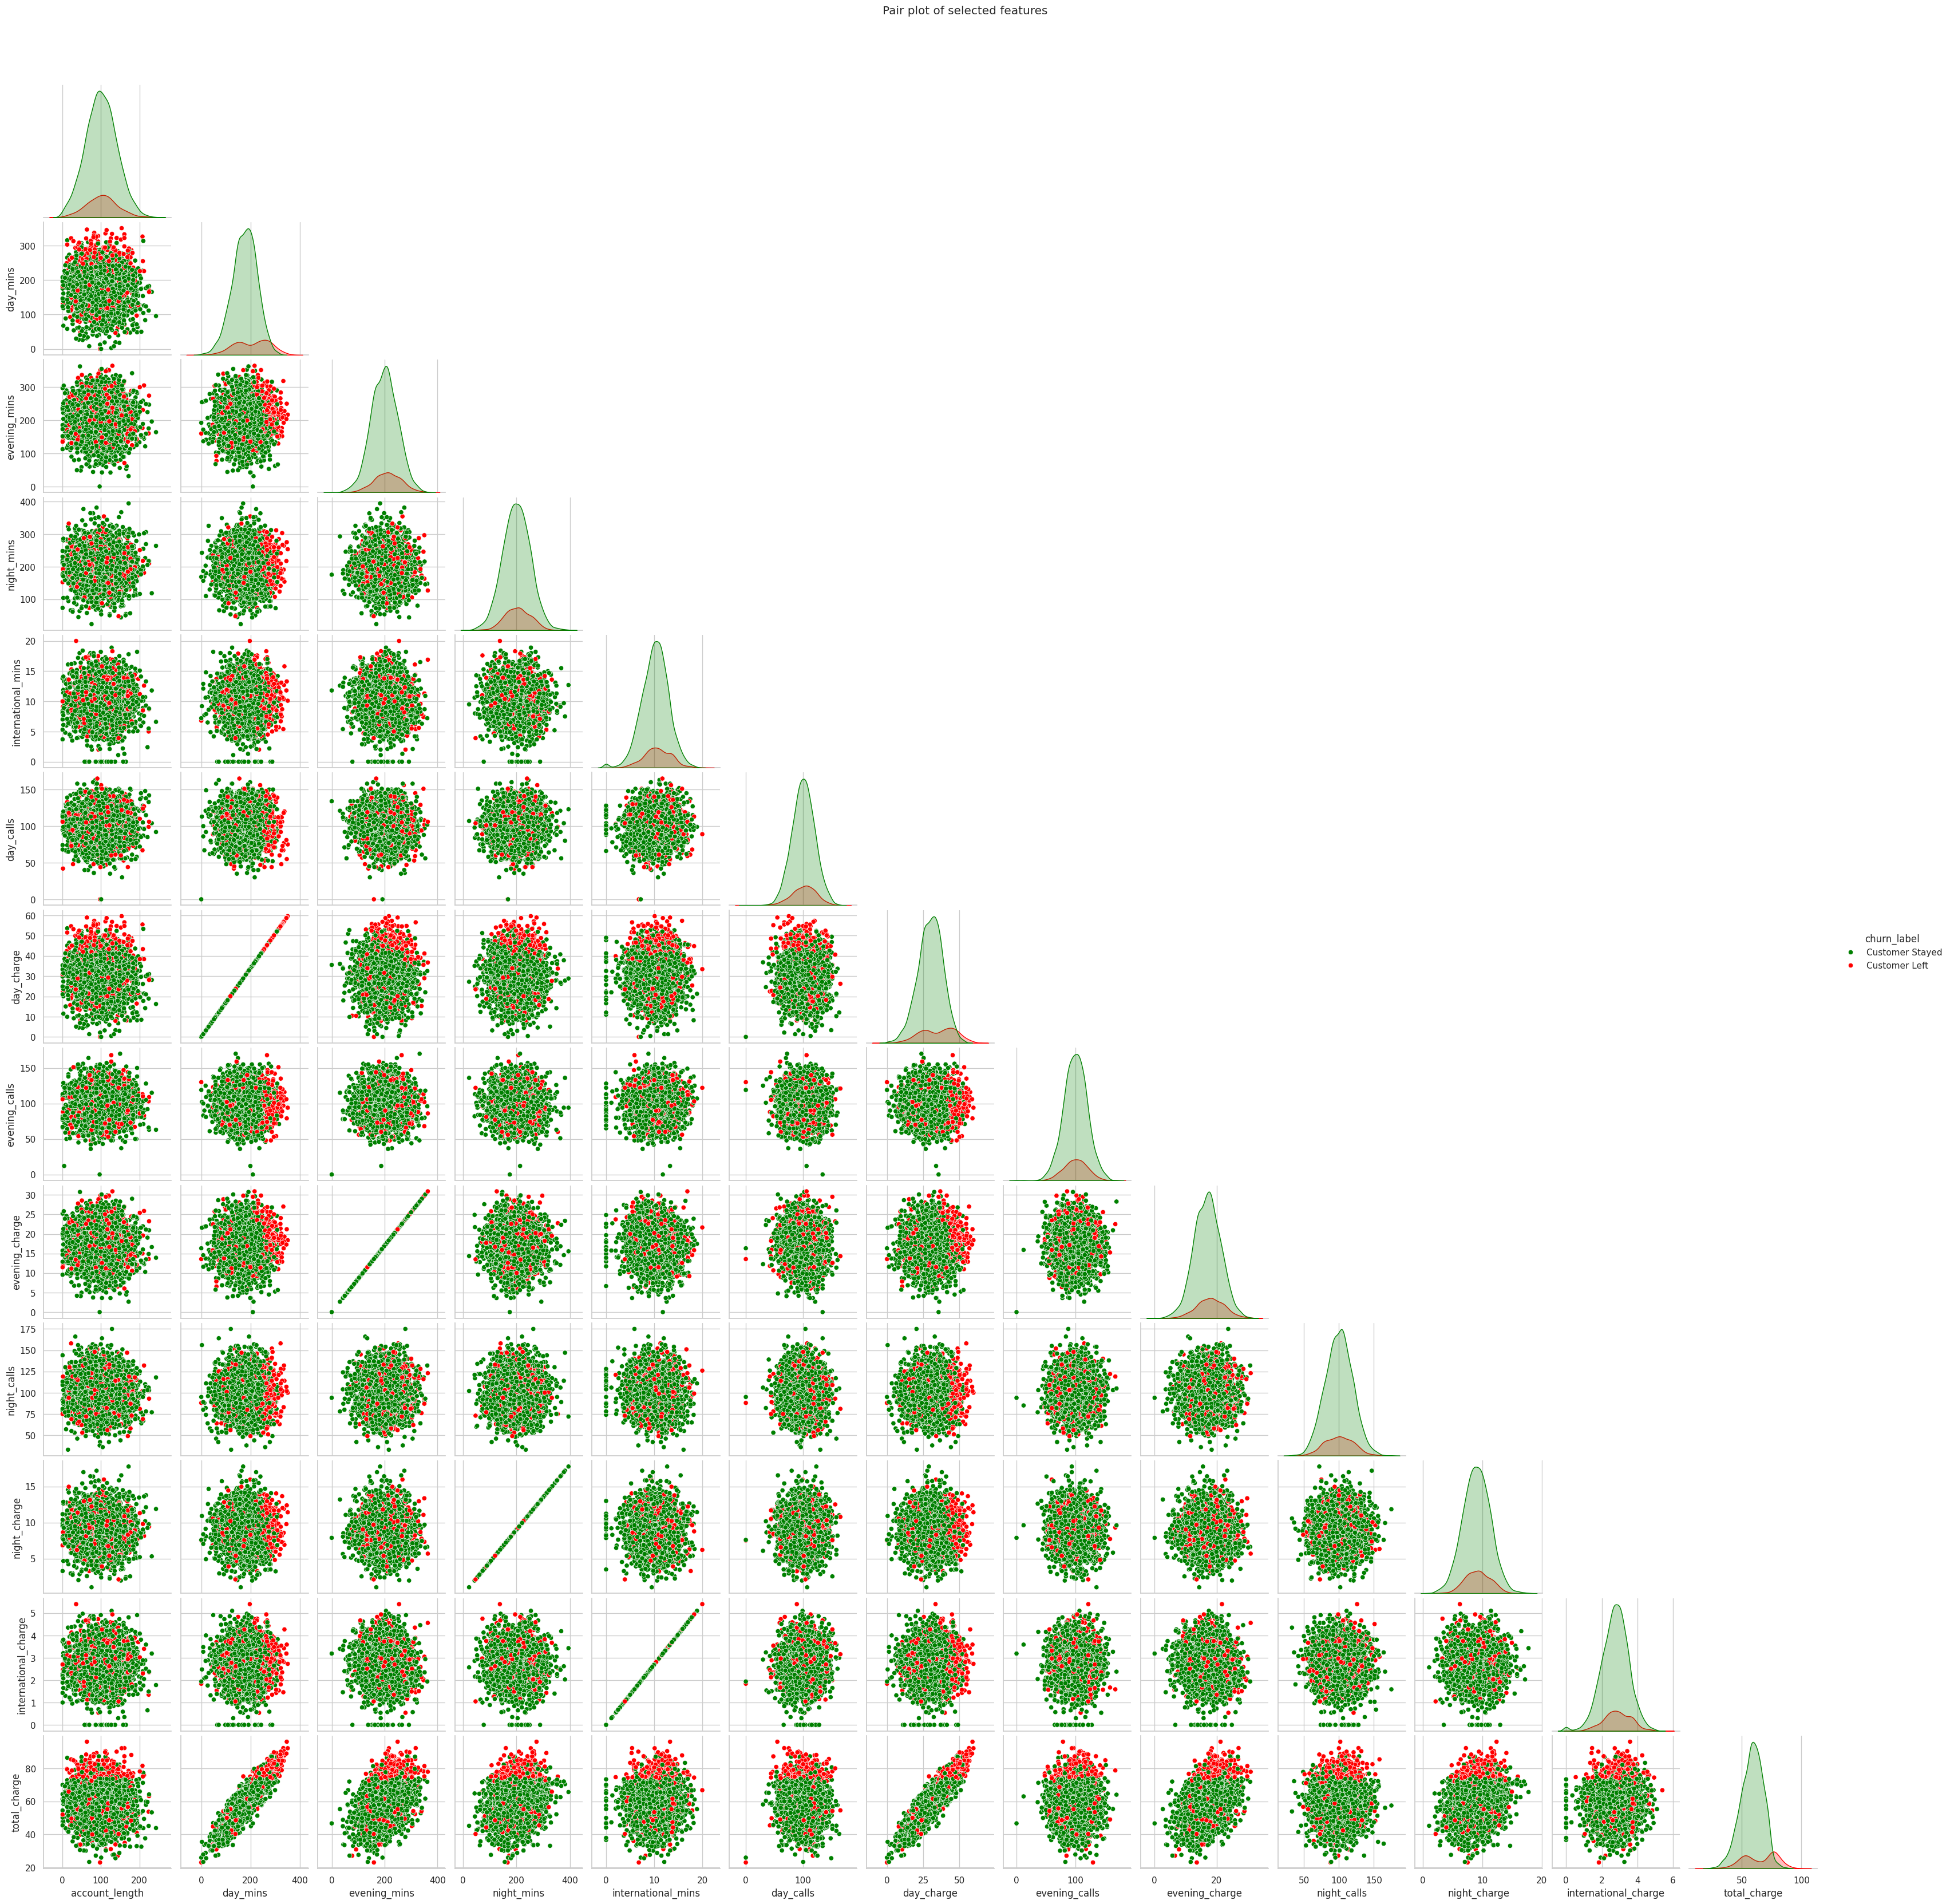

In [12]:
# 3. Pairplot
pair_cols = [
    'account_length', 'day_mins', 'evening_mins', 'night_mins',
    'international_mins', 'day_calls', 'day_charge',
    'evening_calls', 'evening_charge', 'night_calls',
    'night_charge', 'international_charge', 'total_charge', 'churn_label'
]

# copy dataframe and map churn labels
label_map = {0: 'Customer Stayed', 1: 'Customer Left'}
df1 = df.copy()
df1['churn_label'] = df1['churn'].map(label_map)

palette = {'Customer Stayed': 'green', 'Customer Left': 'red'}

sns.pairplot(df1[pair_cols], hue='churn_label', palette=palette, corner=True)
plt.suptitle('Pair plot of selected features', y=1.03)
plt.show()

This is a pair plot showing scatterplots and distributions of multiple features, colored by class label (green for one class, red for another).

It helps visualize correlations between features and how well the classes separate across feature combinations.

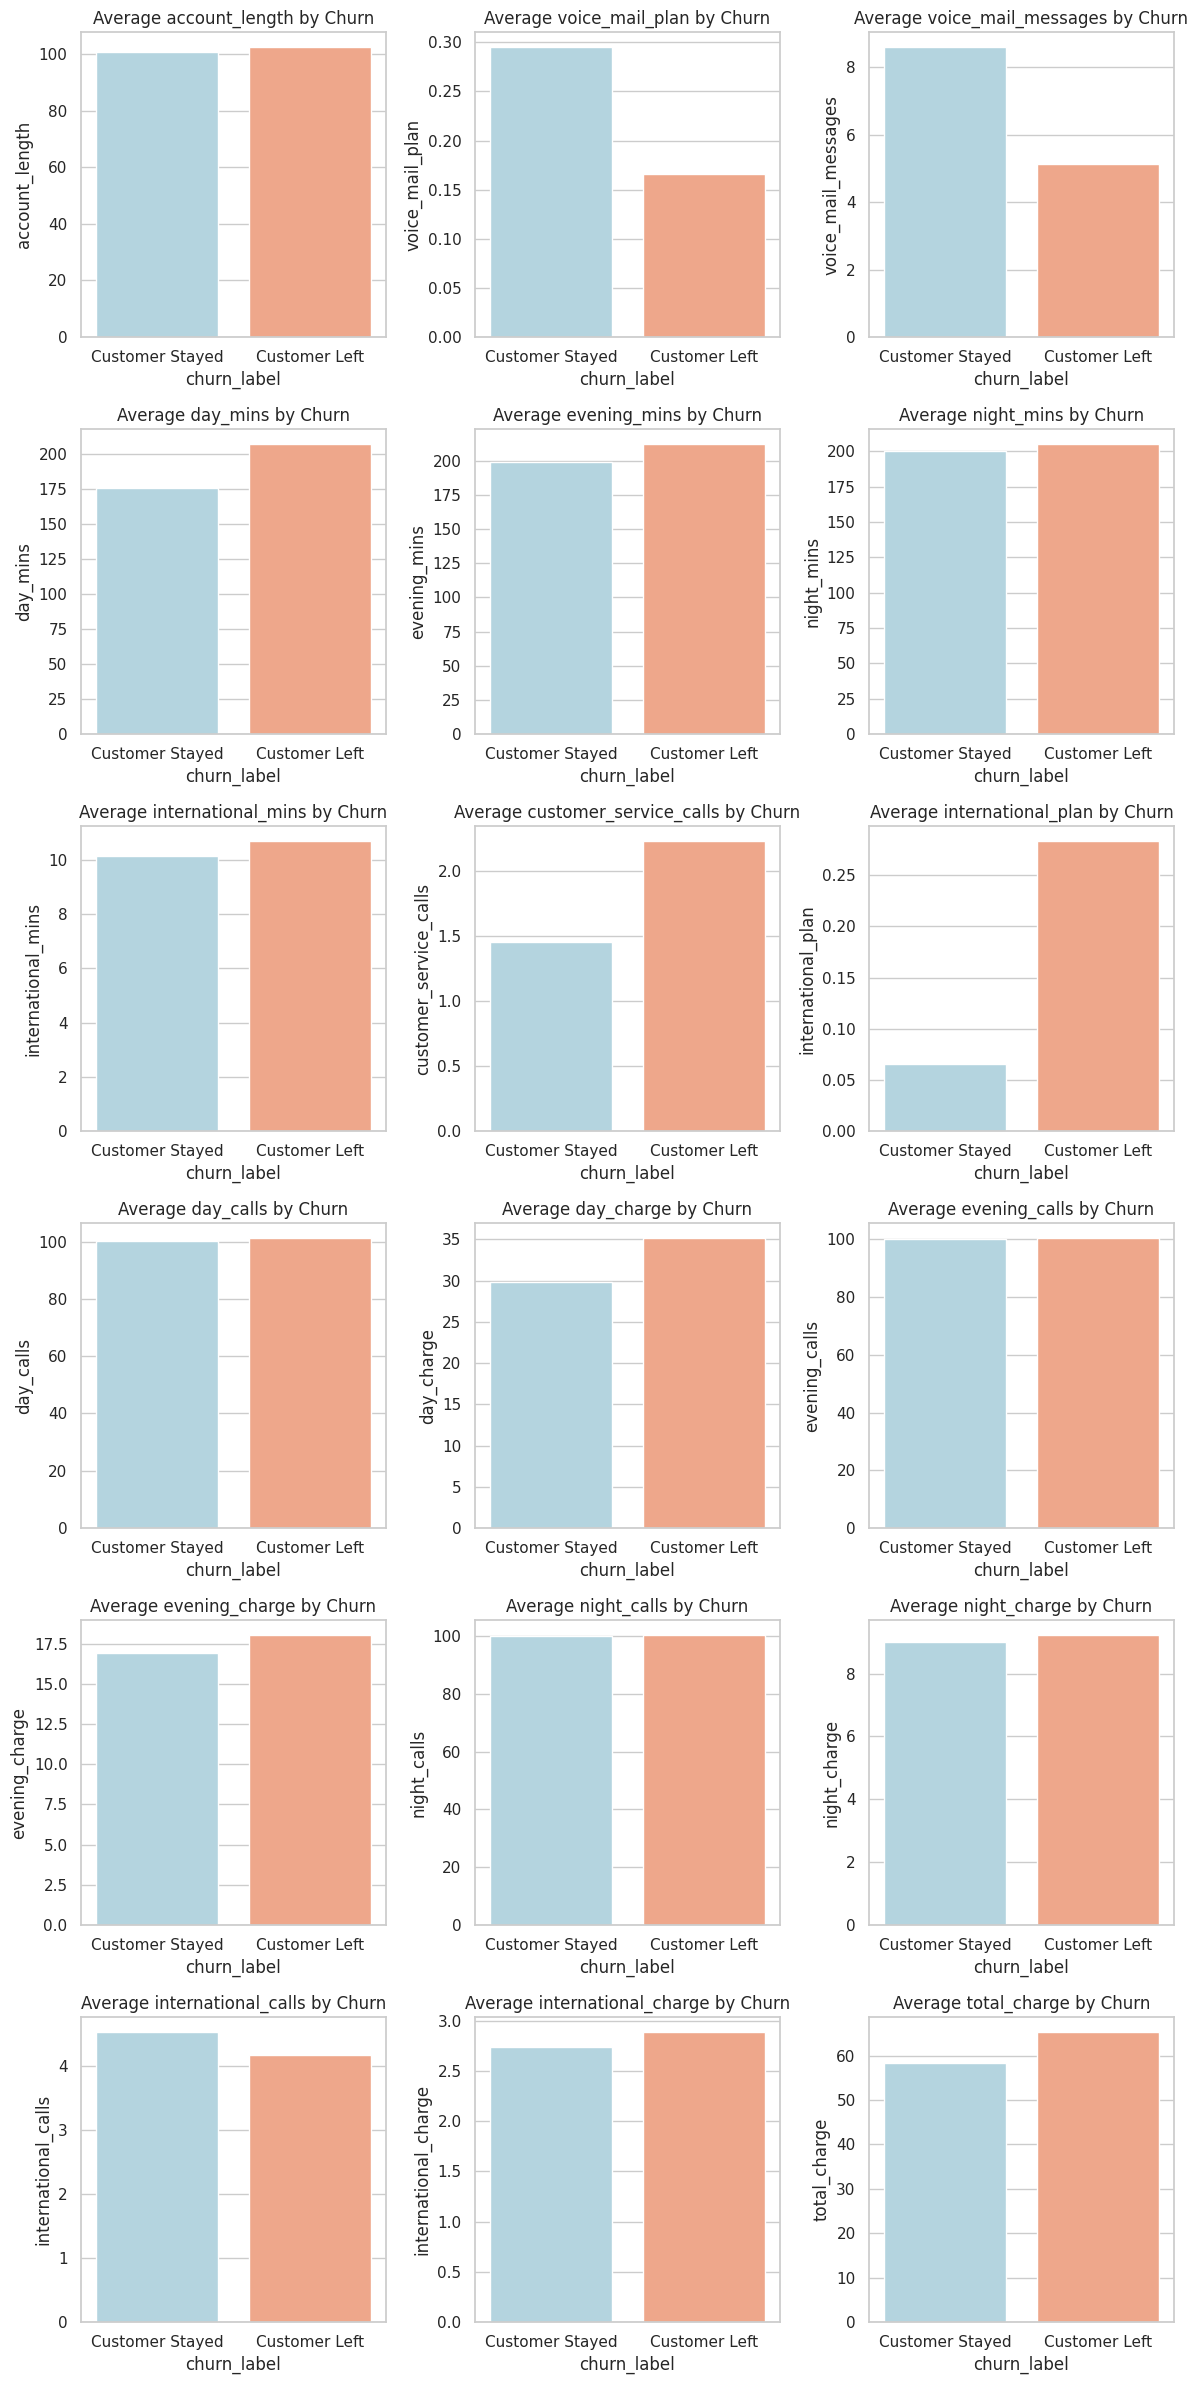

In [13]:
# 4. Bar Plots
plot_cols = [col for col in cols_to_plot if col not in ['churn', 'churn_label']]

palette = {'Customer Stayed': 'lightblue', 'Customer Left': 'lightsalmon'}

n_rows = (len(plot_cols) + 1) // 3
n_cols = 3

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(data=df1, x='churn_label', y=col, palette=palette, ci=None)
    plt.title(f'Average {col} by Churn')

plt.tight_layout()
plt.show()

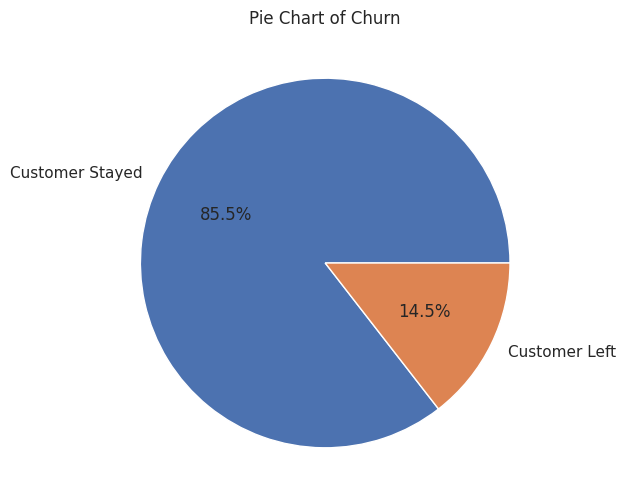

In [14]:
# 5. Pie Chart
df1['churn_label'].value_counts().plot.pie(autopct= '%1.1f%%', figsize= (6,6))
plt.title("Pie Chart of Churn")
plt.ylabel('')
plt.show()

In [15]:
df1.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn      churn_label  
0         75.56      0  Customer Stayed  
1         59.24      0  Customer Stayed  
2         62.29      0  Customer Stayed  
3         66.80      0  Customer Stayed  
4         52.09      0  Customer Stayed

In [16]:
# Only want numerical columns for plots now
num_cols = [c for c in df1.columns if c not in ('churn', 'churn_label')]

# ensure numeric selection
num_cols = df1[num_cols].select_dtypes(include=[np.number]).columns.tolist()
print("Numeric features used:", num_cols)

Numeric features used: ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']


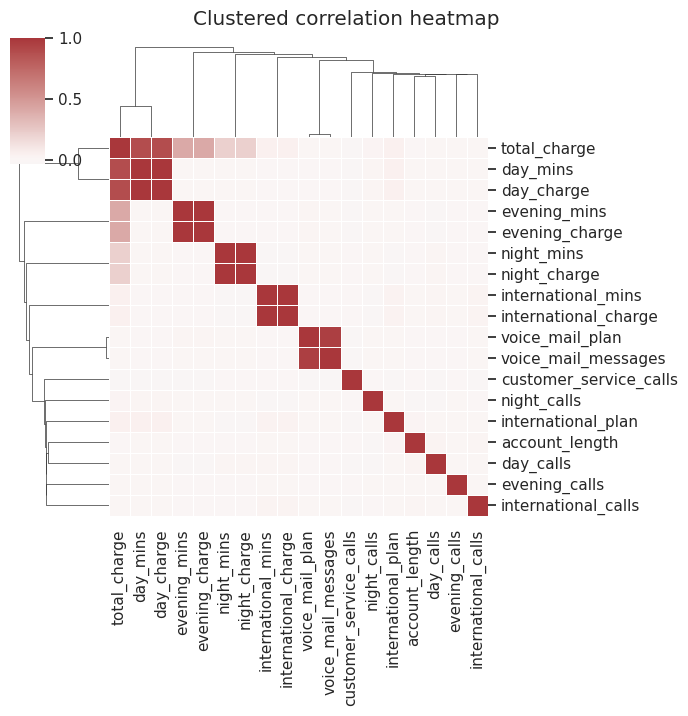

In [17]:
# 6. Clustered correlation heatmap
corr = df1[num_cols].corr()

g = sns.clustermap(corr, cmap='vlag', linewidths=.5, figsize=(7,7), center=0)
g.fig.suptitle('Clustered correlation heatmap', y=1.02)
plt.show()

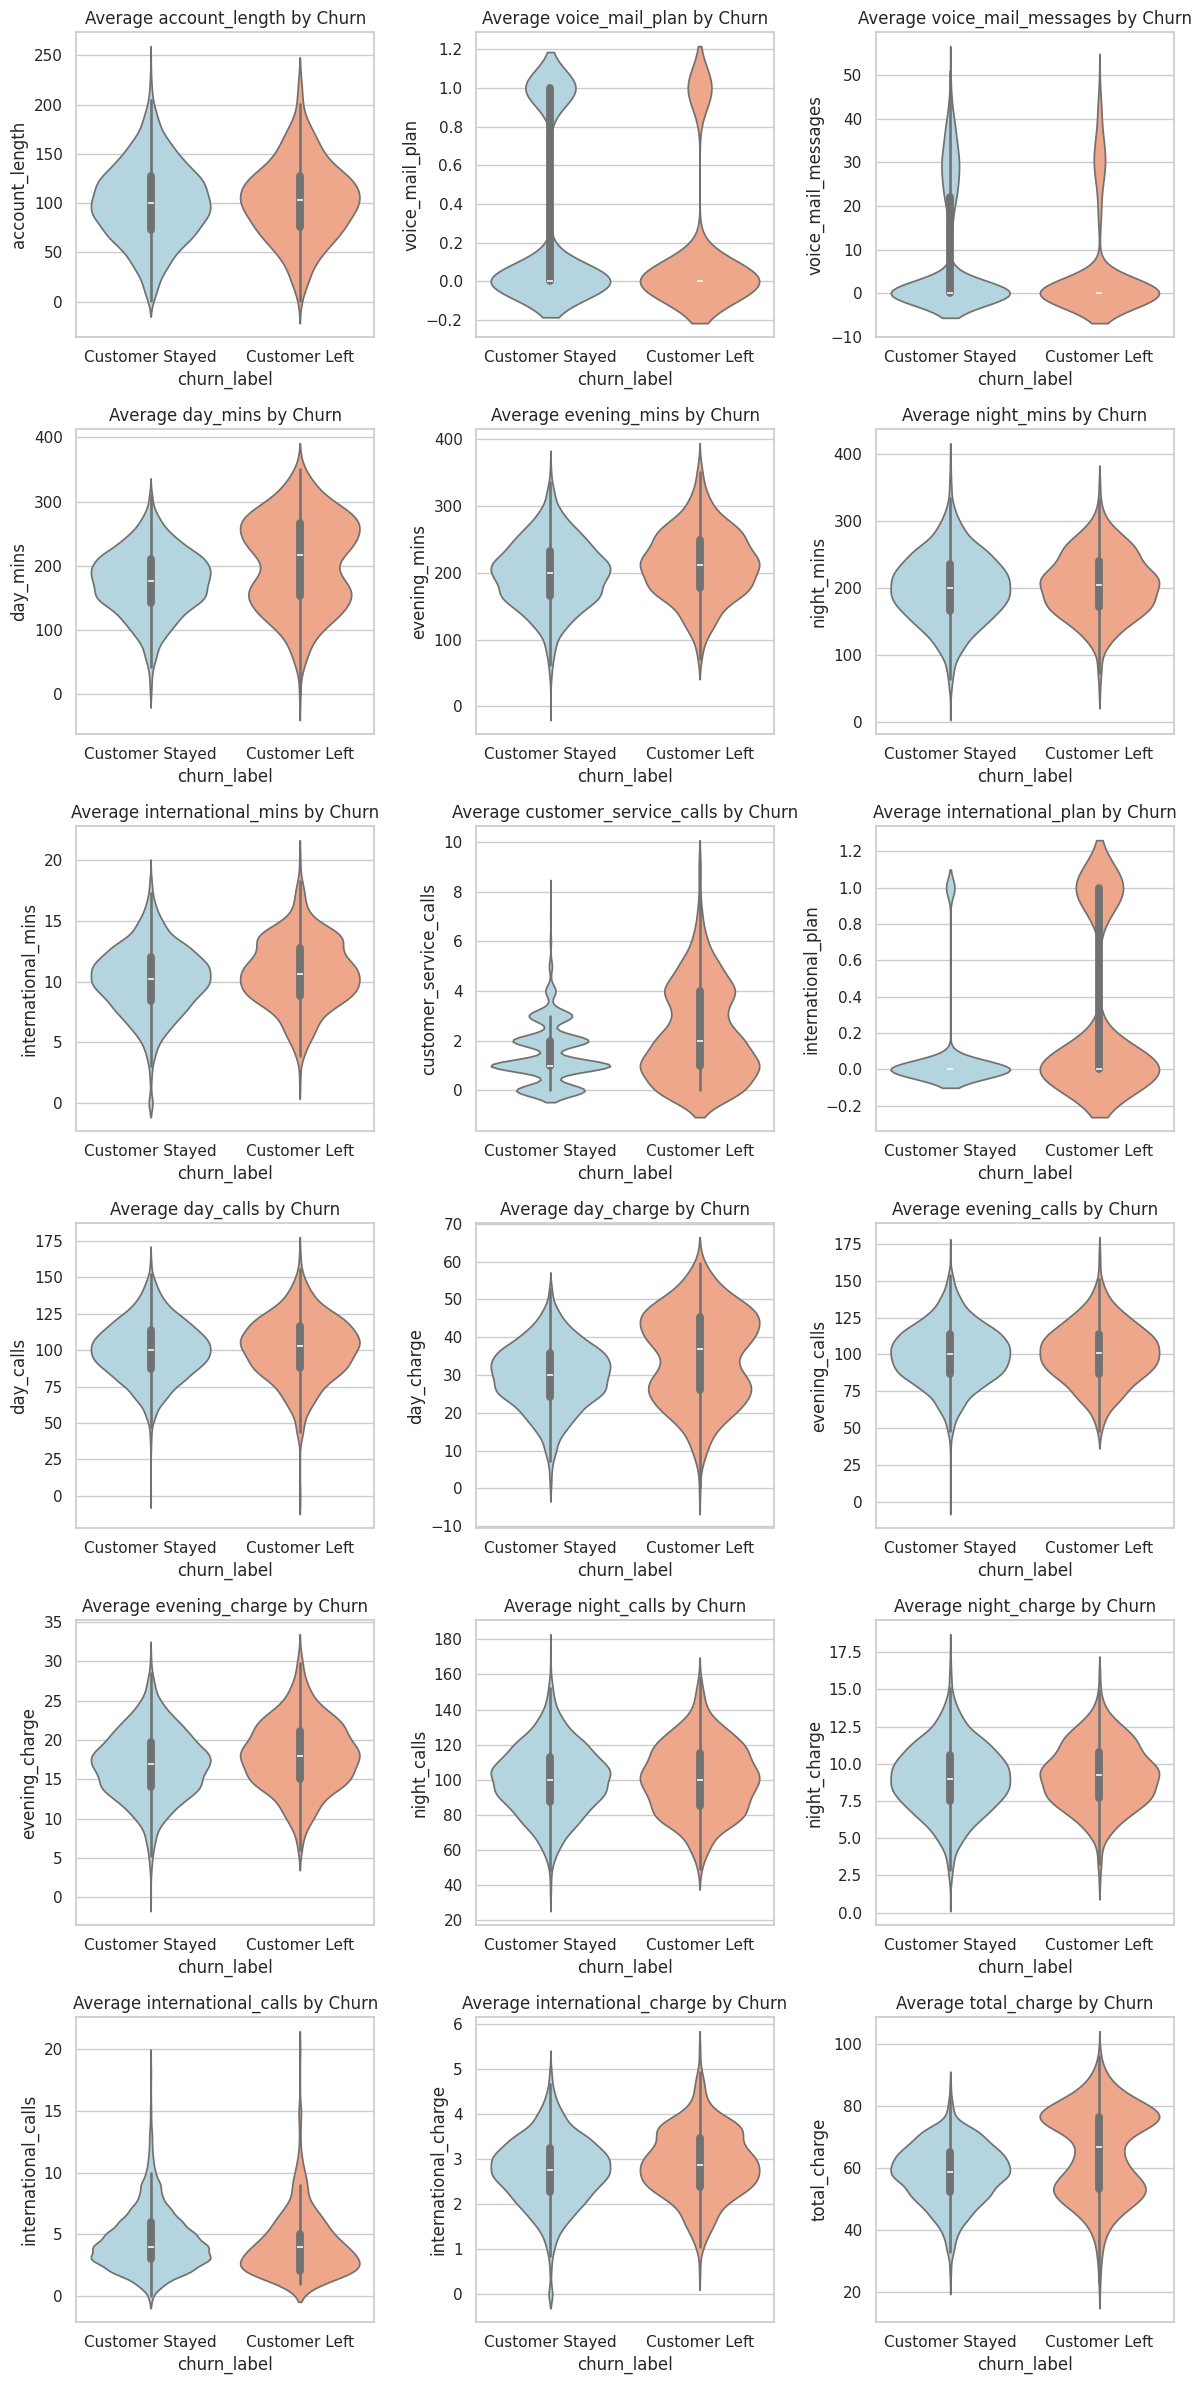

In [18]:
# 7. Violin plots
plot_cols = [col for col in cols_to_plot if col not in ['churn', 'churn_label']]

palette = {'Customer Stayed': 'lightblue', 'Customer Left': 'lightsalmon'}

n_rows = (len(plot_cols) + 1) // 3
n_cols = 3

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=df1, x='churn_label', y=col, palette=palette)
    plt.title(f'Average {col} by Churn')

plt.tight_layout()
plt.show()

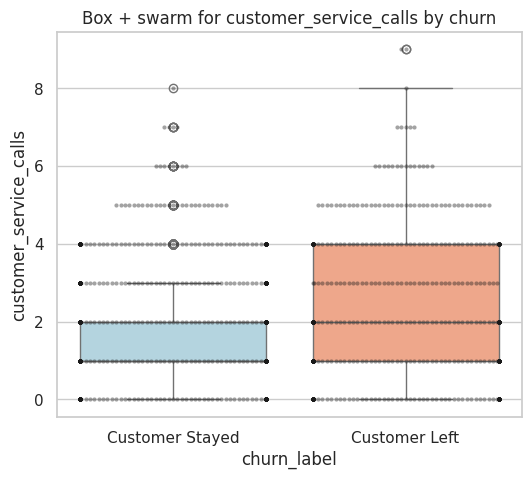

In [19]:
# 8. Box + swarm
feat = 'customer_service_calls'
if feat in num_cols:
    plt.figure(figsize=(6,5))
    sns.boxplot(data=df1, x='churn_label', y=feat, palette=palette)
    sns.swarmplot(data=df1, x='churn_label', y=feat, color='k', alpha=0.4, size=3)
    plt.title(f'Box + swarm for {feat} by churn')
    plt.show()
else:
    print(f"{feat} not found in numeric columns")

This plot shows that customers who left made more customer service calls on average compared to those who stayed.

Higher call frequency, especially with outliers, appears to be associated with churn.

### Feature Importance

[LightGBM] [Info] Number of positive: 386, number of negative: 2280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2641
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144786 -> initscore=-1.776093
[LightGBM] [Info] Start training from score -1.776093


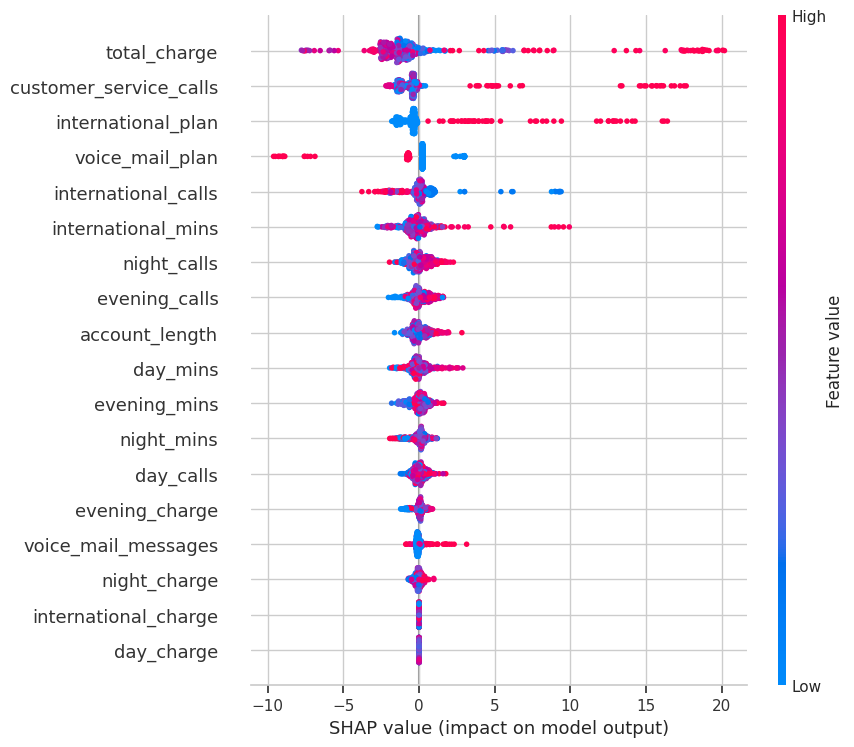

In [20]:
# 9. LightGBM quick fit + SHAP beeswarm (model-based importance)
try:
    import lightgbm as lgb
    import shap
    from sklearn.model_selection import train_test_split

    X = df1[num_cols].fillna(0)
    y = df1['churn']  # numeric 0/1

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = lgb.LGBMClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    # build explainer on a subset if large
    explainer = shap.Explainer(model)
    shap_values = explainer(X_valid.sample(min(500, len(X_valid)), random_state=42))
    shap.plots.beeswarm(shap_values, max_display=20)
except Exception as e:
    print("Install lightgbm and shap to run model-based plots. Error:", e)

This SHAP summary plot shows that customer_service_calls, total_charge, and international_plan have the strongest impact on churn predictions.

High values of these features generally push the model towards predicting churn.

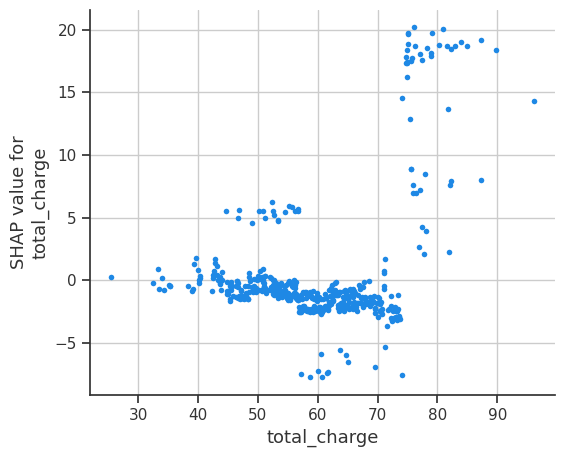

In [21]:
# 10. SHAP dependence plot for one important feature
try:
    # choose top feature by importance if model was trained
    top_feat = X.columns[np.argsort(model.feature_importances_)[-1]]
    shap.dependence_plot(top_feat, shap_values.values, X_valid.sample(min(500, len(X_valid)), random_state=42), interaction_index=None)
except Exception as e:
    print("Run the LightGBM+SHAP block successfully first. Error:", e)

This SHAP (Shapley Additive exPlanations) dependence plot shows how the feature total_charge influences the model’s output.

At higher total charges (around 70+), the SHAP values rise sharply, indicating a strong positive contribution to predicting churn.

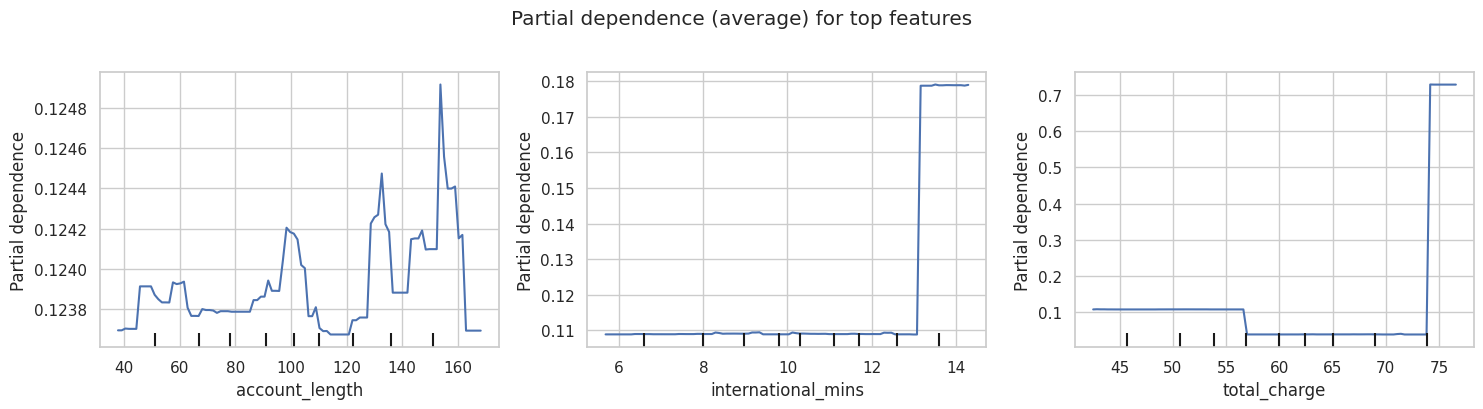

In [22]:
# 11. Partial dependence plots (PDP) for top features
try:
    from sklearn.inspection import PartialDependenceDisplay
    top_idxs = np.argsort(model.feature_importances_)[-3:]
    top_feats = X.columns[top_idxs]
    fig, axs = plt.subplots(1, len(top_feats), figsize=(5*len(top_feats), 4))
    for i, feat in enumerate(top_feats):
        PartialDependenceDisplay.from_estimator(model, X_valid, [feat], ax=axs[i], kind='average')
    plt.suptitle('Partial dependence (average) for top features', y=1.02)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("PDP requires a trained model. Error:", e)

This partial dependence plot shows how account_length, international_mins, and total_charge affect churn probability on average.

The model is especially sensitive to higher values of international minutes and total charge, which sharply increase churn risk.

In [23]:
df1.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn      churn_label  
0         75.56      0  Customer Stayed  
1         59.24      0  Customer Stayed  
2         62.29      0  Customer Stayed  
3         66.80      0  Customer Stayed  
4         52.09      0  Customer Stayed

# Model Building

In [24]:
df1.drop('churn_label', axis= 1, inplace= True)

In [25]:
df1.head()

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0


📊 Logistic Regression Evaluation
----------------------------------------
Accuracy : 0.8650
Precision: 0.5781
Recall   : 0.2552
F1-score : 0.3541
ROC AUC  : 0.8141

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       855
           1       0.58      0.26      0.35       145

    accuracy                           0.86      1000
   macro avg       0.73      0.61      0.64      1000
weighted avg       0.84      0.86      0.84      1000



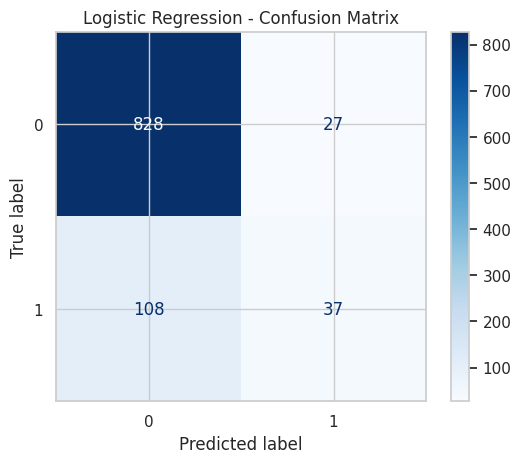


📊 SVM Evaluation
----------------------------------------
Accuracy : 0.9150
Precision: 0.8947
Recall   : 0.4690
F1-score : 0.6154
ROC AUC  : 0.9003

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       855
           1       0.89      0.47      0.62       145

    accuracy                           0.92      1000
   macro avg       0.91      0.73      0.78      1000
weighted avg       0.91      0.92      0.90      1000



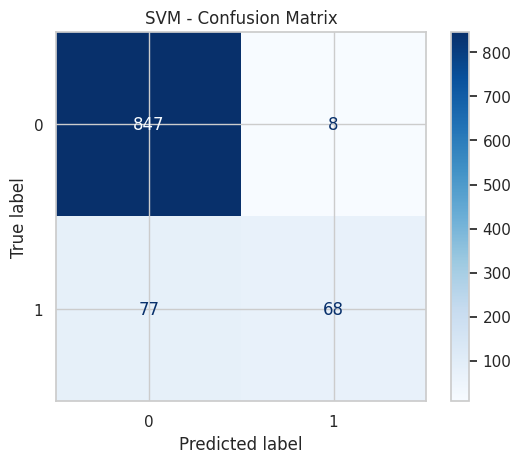


📊 Random Forest Evaluation
----------------------------------------
Accuracy : 0.9720
Precision: 1.0000
Recall   : 0.8069
F1-score : 0.8931
ROC AUC  : 0.9065

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       855
           1       1.00      0.81      0.89       145

    accuracy                           0.97      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.97      0.97      0.97      1000



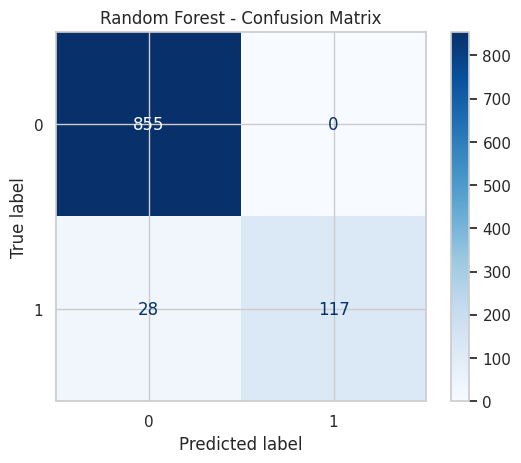


📊 Gradient Boosting Evaluation
----------------------------------------
Accuracy : 0.9740
Precision: 0.9837
Recall   : 0.8345
F1-score : 0.9030
ROC AUC  : 0.9190

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       855
           1       0.98      0.83      0.90       145

    accuracy                           0.97      1000
   macro avg       0.98      0.92      0.94      1000
weighted avg       0.97      0.97      0.97      1000



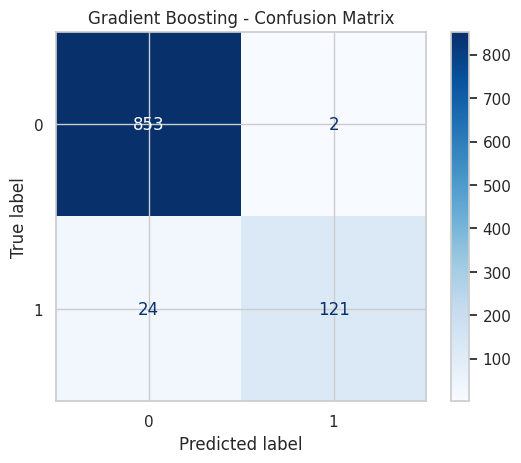


📊 XGBoost Evaluation
----------------------------------------
Accuracy : 0.9720
Precision: 1.0000
Recall   : 0.8069
F1-score : 0.8931
ROC AUC  : 0.9090

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       855
           1       1.00      0.81      0.89       145

    accuracy                           0.97      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.97      0.97      0.97      1000



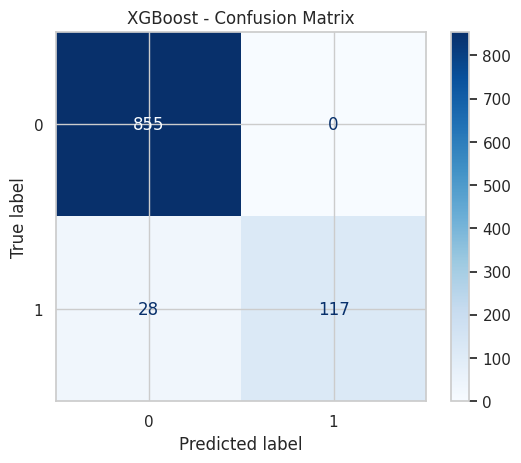

[LightGBM] [Info] Number of positive: 338, number of negative: 1995
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1722
[LightGBM] [Info] Number of data points in the train set: 2333, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144878 -> initscore=-1.775353
[LightGBM] [Info] Start training from score -1.775353

📊 LightGBM Evaluation
----------------------------------------
Accuracy : 0.9700
Precision: 0.9528
Recall   : 0.8345
F1-score : 0.8897
ROC AUC  : 0.9172

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       855
           1       0.95      0.83      0.89       145

    accuracy                           0.97      1000
   macro avg       0.96      0.91      0.94      1000
weighted avg       0.97      0.97      0.97      1000



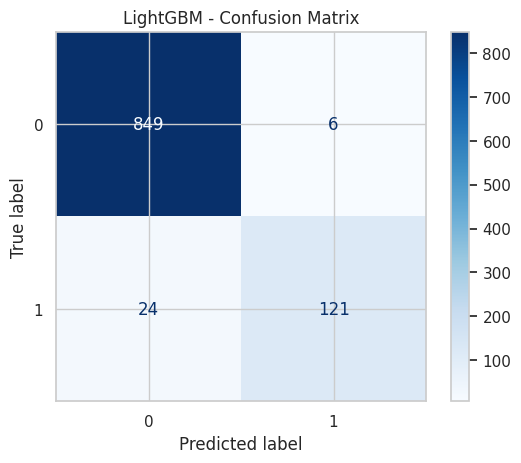


📊 KNN Evaluation
----------------------------------------
Accuracy : 0.8890
Precision: 0.8148
Recall   : 0.3034
F1-score : 0.4422
ROC AUC  : 0.8084

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       855
           1       0.81      0.30      0.44       145

    accuracy                           0.89      1000
   macro avg       0.85      0.65      0.69      1000
weighted avg       0.88      0.89      0.87      1000



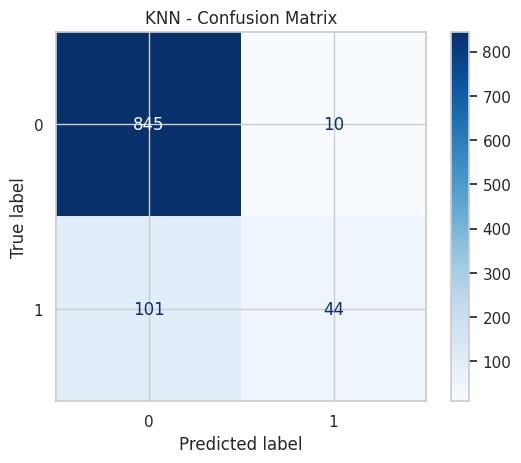


🏆 Model Performance Summary:

                     Accuracy  Precision    Recall        F1   ROC AUC
Gradient Boosting       0.974   0.983740  0.834483  0.902985  0.919000
XGBoost                 0.972   1.000000  0.806897  0.893130  0.908982
Random Forest           0.972   1.000000  0.806897  0.893130  0.906538
LightGBM                0.970   0.952756  0.834483  0.889706  0.917241
SVM                     0.915   0.894737  0.468966  0.615385  0.900262
KNN                     0.889   0.814815  0.303448  0.442211  0.808421
Logistic Regression     0.865   0.578125  0.255172  0.354067  0.814132


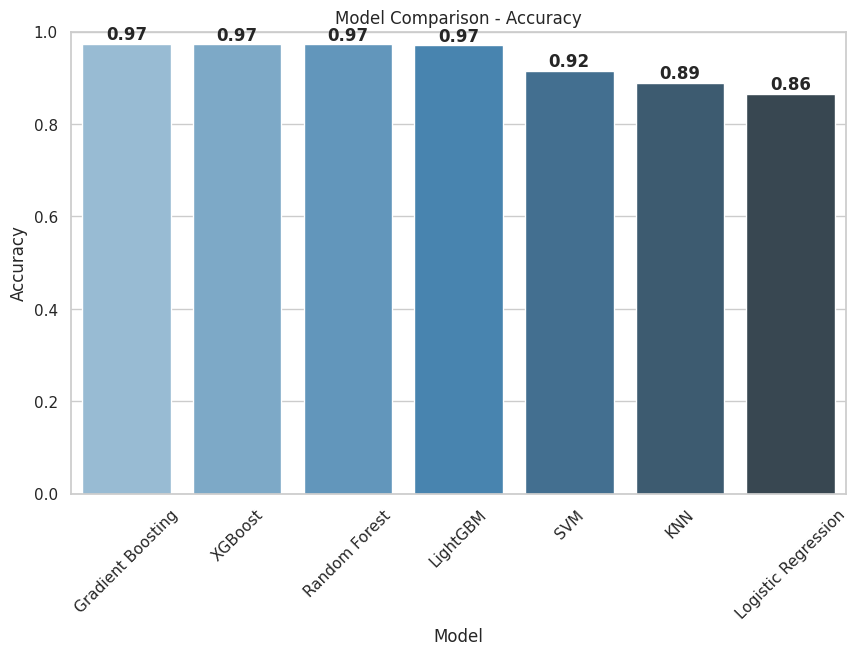

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define feature groups
numeric_cols = [
    'account_length', 'voice_mail_messages', 'day_mins', 'evening_mins',
    'night_mins', 'international_mins', 'customer_service_calls',
    'day_calls', 'evening_calls', 'night_calls', 'international_calls', 'total_charge'
]

categorical_cols = ['voice_mail_plan', 'international_plan']
target_col = 'churn'

# Split features and target
X = df1[numeric_cols + categorical_cols]
y = df1[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scaling
standard_scaler = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std[numeric_cols] = standard_scaler.fit_transform(X_train[numeric_cols])
X_test_std[numeric_cols] = standard_scaler.transform(X_test[numeric_cols])

# Function for evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, results_dict):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

    results_dict[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC AUC": auc
    }

    print(f"\n📊 {model_name} Evaluation")
    print("-" * 40)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    if y_prob is not None:
        print(f"ROC AUC  : {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='d')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Dictionary to store model results
results = {}

# 1. Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000, random_state=42),
               X_train_std, X_test_std, y_train, y_test, "Logistic Regression", results)

# 2. Support Vector Machine
evaluate_model(SVC(kernel='rbf', probability=True, random_state=42),
               X_train_std, X_test_std, y_train, y_test, "SVM", results)

# 3. Random Forest
evaluate_model(RandomForestClassifier(n_estimators=200, random_state=42),
               X_train, X_test, y_train, y_test, "Random Forest", results)

# 4. Gradient Boosting
evaluate_model(GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42),
               X_train, X_test, y_train, y_test, "Gradient Boosting", results)

# 5. XGBoost
evaluate_model(XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
), X_train, X_test, y_train, y_test, "XGBoost", results)

# 6. LightGBM
evaluate_model(LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
), X_train, X_test, y_train, y_test, "LightGBM", results)

# 7. KNN
evaluate_model(KNeighborsClassifier(n_neighbors=5),
               X_train_std, X_test_std, y_train, y_test, "KNN", results)

# Create a DataFrame from results
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print("\n🏆 Model Performance Summary:\n")
print(results_df)

# Plot bar chart for accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df["Accuracy"], palette="Blues_d")
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0, 1)
for i, v in enumerate(results_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [31]:
import joblib

# Define numeric and categorical columns
numeric_cols = [
    'account_length', 'voice_mail_messages', 'day_mins', 'evening_mins',
    'night_mins', 'international_mins', 'customer_service_calls',
    'day_calls', 'evening_calls', 'night_calls', 'international_calls', 'total_charge'
]

categorical_cols = ['voice_mail_plan', 'international_plan']
target_col = 'churn'

# Separate features and target
X = df1[numeric_cols + categorical_cols]
y = df1[target_col]

# Scale numeric features (optional but recommended for consistency)
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Initialize and fit Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)
gb_model.fit(X_scaled, y)

# Save both the model and scaler (for future consistent preprocessing)
joblib.dump(gb_model, 'gradient_boosting_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print(" Gradient Boosting model and scaler saved successfully!")

 Gradient Boosting model and scaler saved successfully!
